
## USD vs EUR

In [1]:
%matplotlib inline

from datetime import datetime, timedelta
from pandas import Index
from pandas.io.data import DataReader
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import requests

FIN_SERVICE_PROVIDER = 'yahoo'
PAST_DAYS = 60

# SYMBOL = ['IBM', 'AAPL']
SYMBOL = ['USD', 'EUR']

# today
t1 = datetime.now()
# two months later
t2 = t1 - timedelta(days=PAST_DAYS)

df1  = DataReader(SYMBOL[0],  FIN_SERVICE_PROVIDER , t2, t1)
df2  = DataReader(SYMBOL[1],  FIN_SERVICE_PROVIDER , t2, t1)

### USD

In [2]:
df1.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-16,91.00,92.46,90.82,92.20,5500,92.07047
2015-03-17,91.90,91.90,89.55,90.68,4100,90.55261
2015-03-18,90.01,93.03,89.00,92.50,4600,92.37006
2015-03-19,92.77,93.13,92.36,92.37,3600,92.24024
2015-03-20,92.85,96.37,92.85,95.68,3800,95.54559


### EUR

In [3]:
df2.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-16,31.85,32.62,31.85,32.5,525000,31.80
2015-03-17,32.50,33.00,32.34,32.5,696600,31.80
2015-03-18,32.30,32.57,32.19,32.5,150000,31.80
2015-03-19,32.55,33.00,32.51,33.0,339800,32.28
2015-03-20,33.09,33.20,32.53,33.0,825500,32.28


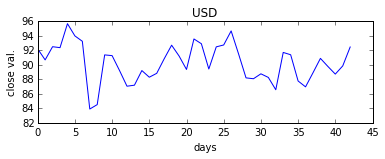

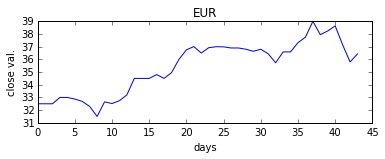

In [4]:
plt.figure(1)
plt.subplot(211)
plt.title(SYMBOL[0])
plt.xlabel('days')
plt.ylabel('close val.')
plt.plot(df1['Close'])

plt.figure(2)
plt.subplot(211)
plt.title(SYMBOL[1])
plt.xlabel('days')
plt.ylabel('close val.')
plt.plot(df2['Close'])

## Bitcoin History vs EUR

In [5]:
BIT_COIN_CSV_URL = 'http://www.quandl.com/api/v1/datasets/BCHARTS/KRAKENEUR.csv'

bcdf = read_csv(BIT_COIN_CSV_URL)
bcdf = bcdf[bcdf['Date']> t2.strftime("%Y-%m-%d")]
#bcdf = bcdf.iloc[::-1]
bcdf = bcdf.sort(['Date'], ascending=[True])
bcdf.index = Index(range(0, len(bcdf)))

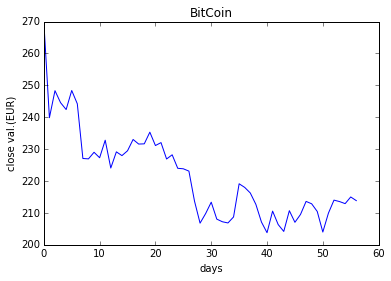

In [6]:
plt.title("BitCoin")
plt.xlabel('days')
plt.ylabel('close val.(EUR)')
plt.plot(bcdf['Close'])

### Close Price Statistics

#### Mean (in 60 Days)

In [7]:
bcdf['Close'].mean()

221.62455912280703

#### Variance (in 60 days)

In [8]:
bcdf['Close'].var()

194.37634550581319

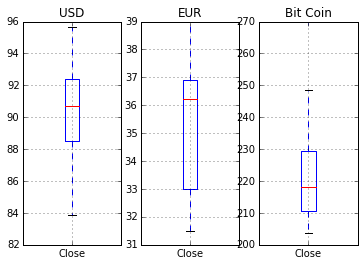

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.set_title(SYMBOL[0])
# ax1.title(SYMBOL[0])
ax1 = df1.boxplot(column='Close', return_type='axes')

ax2 = fig.add_subplot(1,3,2)
# ax2.plt.title(SYMBOL[1])
ax2.set_title(SYMBOL[1])
ax2 = df2.boxplot(column='Close', return_type='axes')

ax3 = fig.add_subplot(1,3,3)
# ax3.plt.title(SYMBOL[1])
ax3.set_title('Bit Coin')
ax3 = bcdf.boxplot(column='Close', return_type='axes')



### Gains

In [10]:
REAL_TIME_VALE_API = 'http://api.coindesk.com/v1/bpi/currentprice.json'
# REAL_TIME_VALE_API = "http://btc.blockr.io/api/v1/coin/info"
r = requests.get(REAL_TIME_VALE_API)
cur_value = 1
if r.status_code == 200:
    _j = r.json()['bpi']['EUR']
    cur_value = float(_j['rate'])
    print("Real time value {} {}".format(_j['rate'], _j['symbol']))

Real time value 208.0738 &euro;


Price per coin: **€208.87** 
This is the value in Euro I invested in **bitcoin**.

In [11]:
price_x_coin = 208.87
gain= float(cur_value) - float(price_x_coin)
print("Gain {}".format(gain))

print("{}%".format((cur_value) / price_x_coin ))

Gain -0.7962
0.996188059559%


### Predict


### Errors evaluation

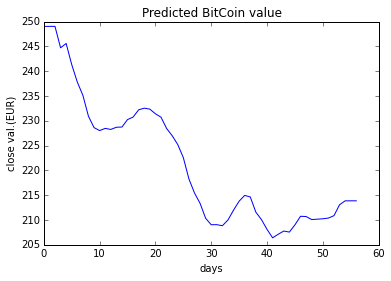

In [12]:
X = [ [x] for x in bcdf.index]
y = bcdf['Close']

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, list(y.values))

Y = [list(neigh.predict([[i]]))[0] for i in range(len(X))]

plt.title("Predicted BitCoin value")
plt.xlabel('days')
plt.ylabel('close val.(EUR)')
plt.plot(Y)

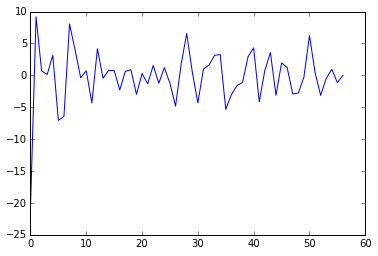

In [13]:
errors = [ Yi-yi for Yi, yi in zip(Y, y)]

plt.plot(errors)

In [14]:
import numpy as np

print("Error mean: {} ".format(np.mean(errors)))

Error mean: -0.180953192982 


### Tomorrow's prediction

In [15]:
print("Tomorrow's predicted closing value {}".format(neigh.predict([[60]])))

Tomorrow's predicted closing value [ 213.865732]
